### Housing Violations Dataset Exploration

Benny Cohen

10/20/2019


In this notebook we will visualize some of the data in the Housing Maintenance Code Violations found at https://data.cityofnewyork.us/Housing-Development/Housing-Maintenance-Code-Violations/wvxf-dwi5

The data describes several housing violations found in NY and provides details including where the incident was, (broken down by boro, and address), how severe it was (broken down into 3 classes, A,B,C where A is least severe and C the most severe)

First we import needed packages and the data

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [162]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv")

In [147]:
df.shape

(1000, 41)

We see by default we are given 1000 rows which is enough to start with. Let's first see which boros have the most incidents

Text(0.5, 1.0, 'Incidents per boro')

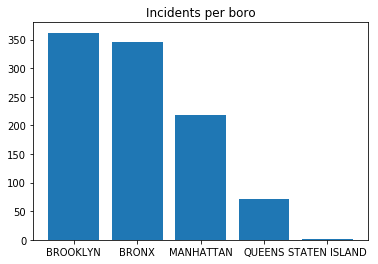

In [150]:
plt.bar(df['boro'].unique(), df['boro'].value_counts())
plt.title("Incidents per boro")

In [151]:
df['boro'].value_counts()

BROOKLYN         362
BRONX            345
MANHATTAN        219
QUEENS            72
STATEN ISLAND      2
Name: boro, dtype: int64

We see that Staten Island has the least number of building code violations from this dataset. It could be that there are less incidents in StatenIsland or for whatever reason when we pulled the data it didn't give us those rows

Now let's see create a boxplot with seaborn to see which boroughs take the longest to respond to incidents. 
The inspection date is the date in which the incident was first observed. The current status is when the status was updated. We want to see how long it took overall, from the time an incident was observed until it was closed

In [152]:
inspection_date = pd.to_datetime(df['inspectiondate'])
current_status_date = pd.to_datetime(df['currentstatusdate'])

In [153]:
df['days_between'] = pd.to_timedelta(current_status_date - inspection_date, unit='d').dt.days
closed_issues = df[df['currentstatus'] == 'VIOLATION CLOSED']

In [154]:
closed_issues[['days_between', 'boro']].head()

,days_between,boro
0,539,BROOKLYN
1,706,BRONX
2,374,BRONX
3,1042,BROOKLYN
4,356,BROOKLYN


In [155]:
import seaborn as sns

Text(0.5, 1.0, 'days to close incidents')

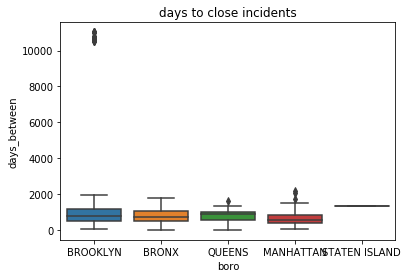

In [158]:
sns.boxplot(x = 'boro', y = 'days_between', data = closed_issues)
plt.title("days to close incidents")

We notice some extreme outliers from Brooklyn. This makes it hard to read the other data points. It's unclear if these points are legit, maybe it took a long time for the incident to be updated as close. Let's zoom in since it makes it hard to read the graph


(0, 2000)

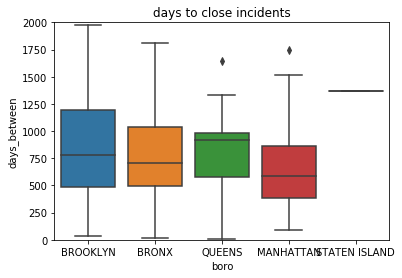

In [159]:
sns.boxplot(x = 'boro', y = 'days_between', data = closed_issues)
plt.title("days to close incidents")
plt.ylim(0,2000)

The deviation for some of these boros are really wide with Brooklyn over a 700 day spread. Queens on average takes the longest but recall that not so many of our data points are from Queens. Likewise there isn't enough data from Staten Island to draw any concusions. 

Let's see how many issues arise per class, (describing how severe an incident is)

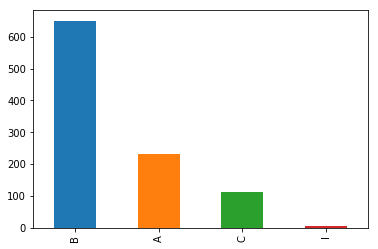

In [160]:
class_counts = df['class'].value_counts()
class_counts.plot.bar()

We see that B incidents have the overwhelming majority, indicating that most incidents have medium severity